# Weather Forecast

Data Input 

In [2]:
#list the sub-folders in the dataset folder
import os
os.chdir('dataset')  
os.listdir()

['weather_data_train.csv',
 'weather_data_train_labels.csv',
 'weather_data_test_labels.csv',
 'weather_data_test.csv']

# Import Packages and Dataset inspection

In [90]:
# Import numpy, pandas for data manipulation
import numpy as np
import pandas as pd
from numpy import asarray
from pandas import read_csv
from pandas import concat
from pandas import DataFrame
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Import matplotlib, seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [ ]:
# Import the data
weather_data = pd.read_csv('weather_data_test.csv',parse_dates=['datetime'], sep=';', decimal=','
                     , infer_datetime_format=True)

# Check the shape of the dataset
print(weather_data.shape)

# Select the datetime and the temperature columns
temp_df = weather_data[["datetime","T_mu"]]
temp_df.head(15)

In [91]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(temp_df, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(temp_df) is list else temp_df.shape[1]
    data = DataFrame(temp_df)
    cols = list()
     # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(data.shift(i))
     # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(data.shift(-i))
     # put it all together
    agg = concat(cols, axis=1)
     # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [92]:
# split a univariate dataset into train/test sets
def train_test_split(temp_df, n_test):
    return temp_df[:-n_test, :], temp_df[-n_test:, :]

In [93]:
def walk_forward_validation(temp_df, n_test):
    predictions = list()
     # split dataset
    train, test = train_test_split(temp_df, n_test)
     # seed history with training dataset
    history = [x for x in train]
     # step over each time-step in the test set
    for i in range(len(test)):
     # split test row into input and output columns
         testX, testy = test[i, :-1], test[i, -1]
     # fit model on history and make a prediction
         yhat = random_forest_forecast(history, testX)
     # store forecast in list of predictions
         predictions.append(yhat)
     # add actual observation to history for the next loop
         history.append(test[i])
     # summarize progress
         print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
     # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, 1], predictions

In [94]:
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
     # transform list into array
    train = asarray(train)
     # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
     # fit model
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
     # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]

(1346, 2)
>expected=8.7, predicted=9.1
>expected=9.3, predicted=7.7
>expected=9.1, predicted=8.7
>expected=8.7, predicted=8.8
>expected=9.3, predicted=8.6
>expected=10.1, predicted=8.8
>expected=11.7, predicted=10.4
>expected=13.8, predicted=10.5
>expected=15.5, predicted=10.1
>expected=16.6, predicted=14.5
>expected=17.3, predicted=16.7
>expected=18.4, predicted=18.2
MAE: 1.451


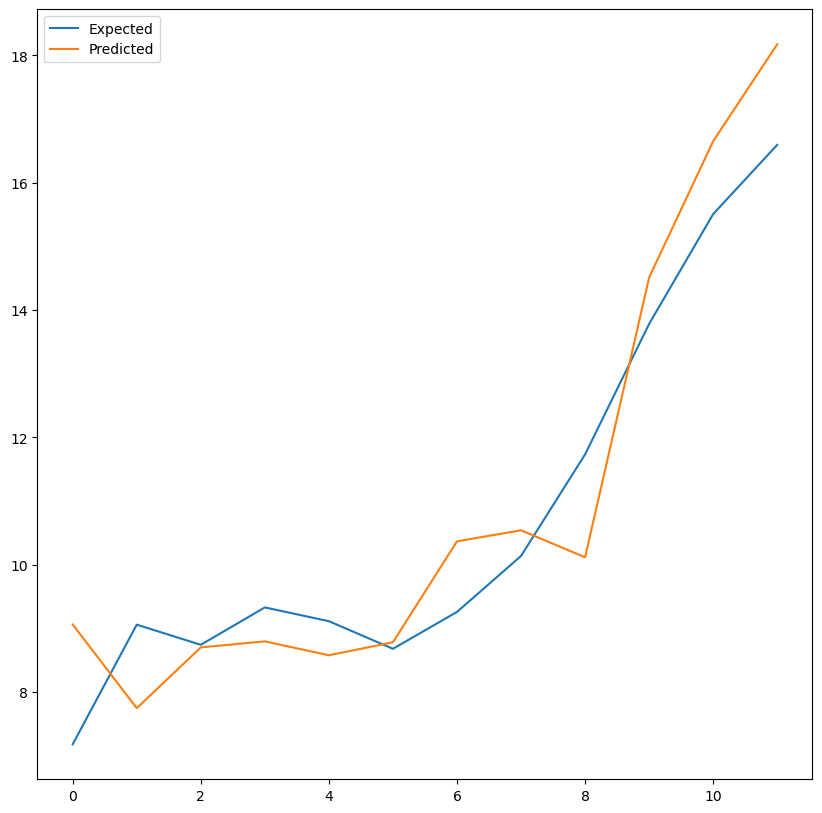

In [103]:
# load the dataset
#series = read_csv('weather_data_test.csv', header=0, index_col=0)
series = read_csv('weather_data_train.csv', parse_dates=['datetime'], sep=';', decimal=','
                     , infer_datetime_format=True)
series_new = series[["datetime","T_mu"]]
series_new['datetime'] = pd.to_numeric(pd.to_datetime(series_new["datetime"]))
print(series_new.shape)
values = series_new.values

# transform the time series data into supervised learning
temp_df = series_to_supervised(values, n_in=2)
# evaluate
mae, y, yhat = walk_forward_validation(temp_df, 12)
print('MAE: %.3f' % mae)
# plot expected vs predicted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()

In [114]:
# # transform a time series dataset into a supervised learning dataset
# def series_to_supervised(temp_df, n_in=1, n_out=1, dropnan=True):
#     n_vars = 1 if type(temp_df) is list else temp_df.shape[1]
#     data = DataFrame(temp_df)
#     cols = list()
#      # input sequence (t-n, ... t-1)
#     for i in range(n_in, 0, -1):
#         cols.append(data.shift(i))
#      # forecast sequence (t, t+1, ... t+n)
#     for i in range(0, n_out):
#         cols.append(data.shift(-i))
#      # put it all together
#     agg = concat(cols, axis=1)
#      # drop rows with NaN values
#     if dropnan:
#         agg.dropna(inplace=True)
#     return agg.values

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [128]:
# load the dataset
#series = read_csv('weather_data_test.csv', header=0, index_col=0)
#values = series.values

series = read_csv('weather_data_test.csv', parse_dates=['datetime'], sep=';', decimal=','
                     , infer_datetime_format=True)
series_new = series[["datetime","T_mu"]]

series_new['datetime'] = pd.to_numeric(pd.to_datetime(series_new["datetime"]))
values = series_new.values
# transform the time series data into supervised learning
#train = series_to_supervised(values, n_in=6)
train = series_to_supervised(values, n_in=6)
# split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]

# fit model
model = RandomForestRegressor(n_estimators=1000)
model.fit(trainX, trainy)

In [149]:
# construct an input for a new prediction
row = values[-13:, 1] #.flatten()
# make a one-step prediction
yhat = model.predict(asarray([row]))
print('Input: %s, Predicted: %.3f' % (row, yhat[0]))

Input: [ 9.05833333  8.74166667  9.32916667  9.1125      8.67916667  9.25833333
 10.1375     11.73333333 13.78333333 15.50833333 16.59583333 17.25833333
 18.43333333], Predicted: 17.007


In [126]:
train[0]

array([1.4412384e+18, 1.3737500e+01, 1.4413248e+18, 1.4825000e+01,
       1.4414112e+18, 1.4275000e+01])

# Dataset Processing

In [6]:
# Check the shape of the dataset
temp_df.shape

(1346, 2)

In [7]:
# Select the subset data from 2016 to 2019
mask = (temp_df['datetime'] >= '2016-01-01') & (temp_df['datetime'] <= '2019-05-21')
temp_df = temp_df.loc[mask]

# Reset the index 
temp_df.set_index("datetime", inplace=True)

# Inspect first 5 rows and last 5 rows of the data
from IPython.display import display
display(temp_df.head(5))
display(temp_df.tail(5))

,T_mu
datetime,
2016-01-01,-4.5500
2016-01-02,-7.0000
2016-01-03,-8.7375
2016-01-04,-11.1750
2016-01-05,-17.6250


,T_mu
datetime,
2019-05-17,13.783333
2019-05-18,15.508333
2019-05-19,16.595833
2019-05-20,17.258333
2019-05-21,18.433333


In [8]:
temp_df.describe()

,T_mu
count,1228.000000
mean,6.302811
std,8.433225
min,-22.675000
25%,0.559375
50%,5.227083
75%,13.784375
max,26.145833


In [9]:
# Output the maximum and minimum temperature date
print(temp_df.loc[temp_df["T_mu"] == temp_df["T_mu"].max()])
print(temp_df.loc[temp_df["T_mu"] == temp_df["T_mu"].min()])

                 T_mu
datetime             
2018-07-17  26.145833
              T_mu
datetime          
2016-01-07 -22.675


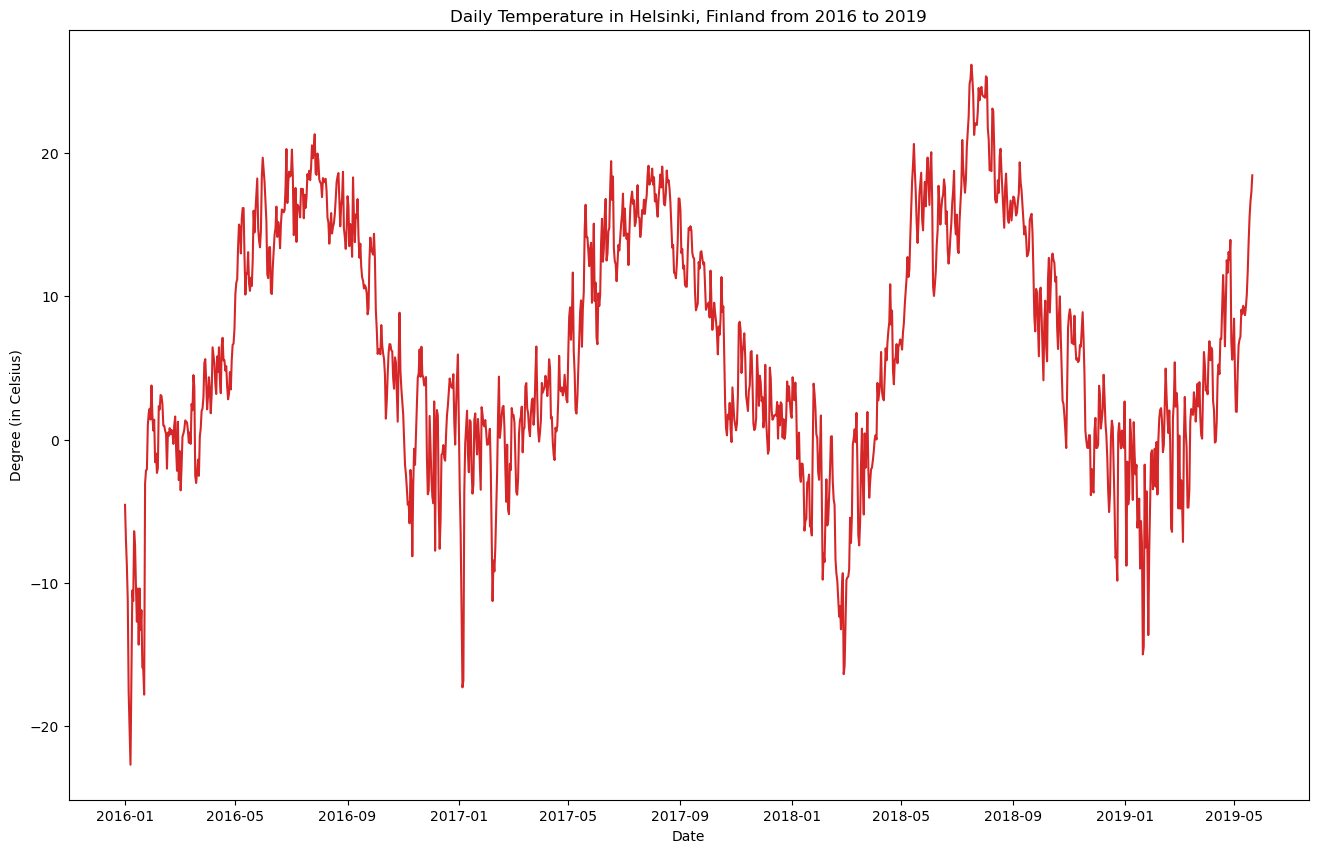

In [10]:
# Plot the daily temperature change 
plt.figure(figsize=(16,10), dpi=100)
plt.plot(temp_df.index, temp_df.T_mu, color='tab:red')
plt.gca().set(title="Daily Temperature in Helsinki, Finland from 2016 to 2019", xlabel='Date', ylabel="Degree (in Celsius)")
plt.show()

<AxesSubplot: xlabel='datetime'>

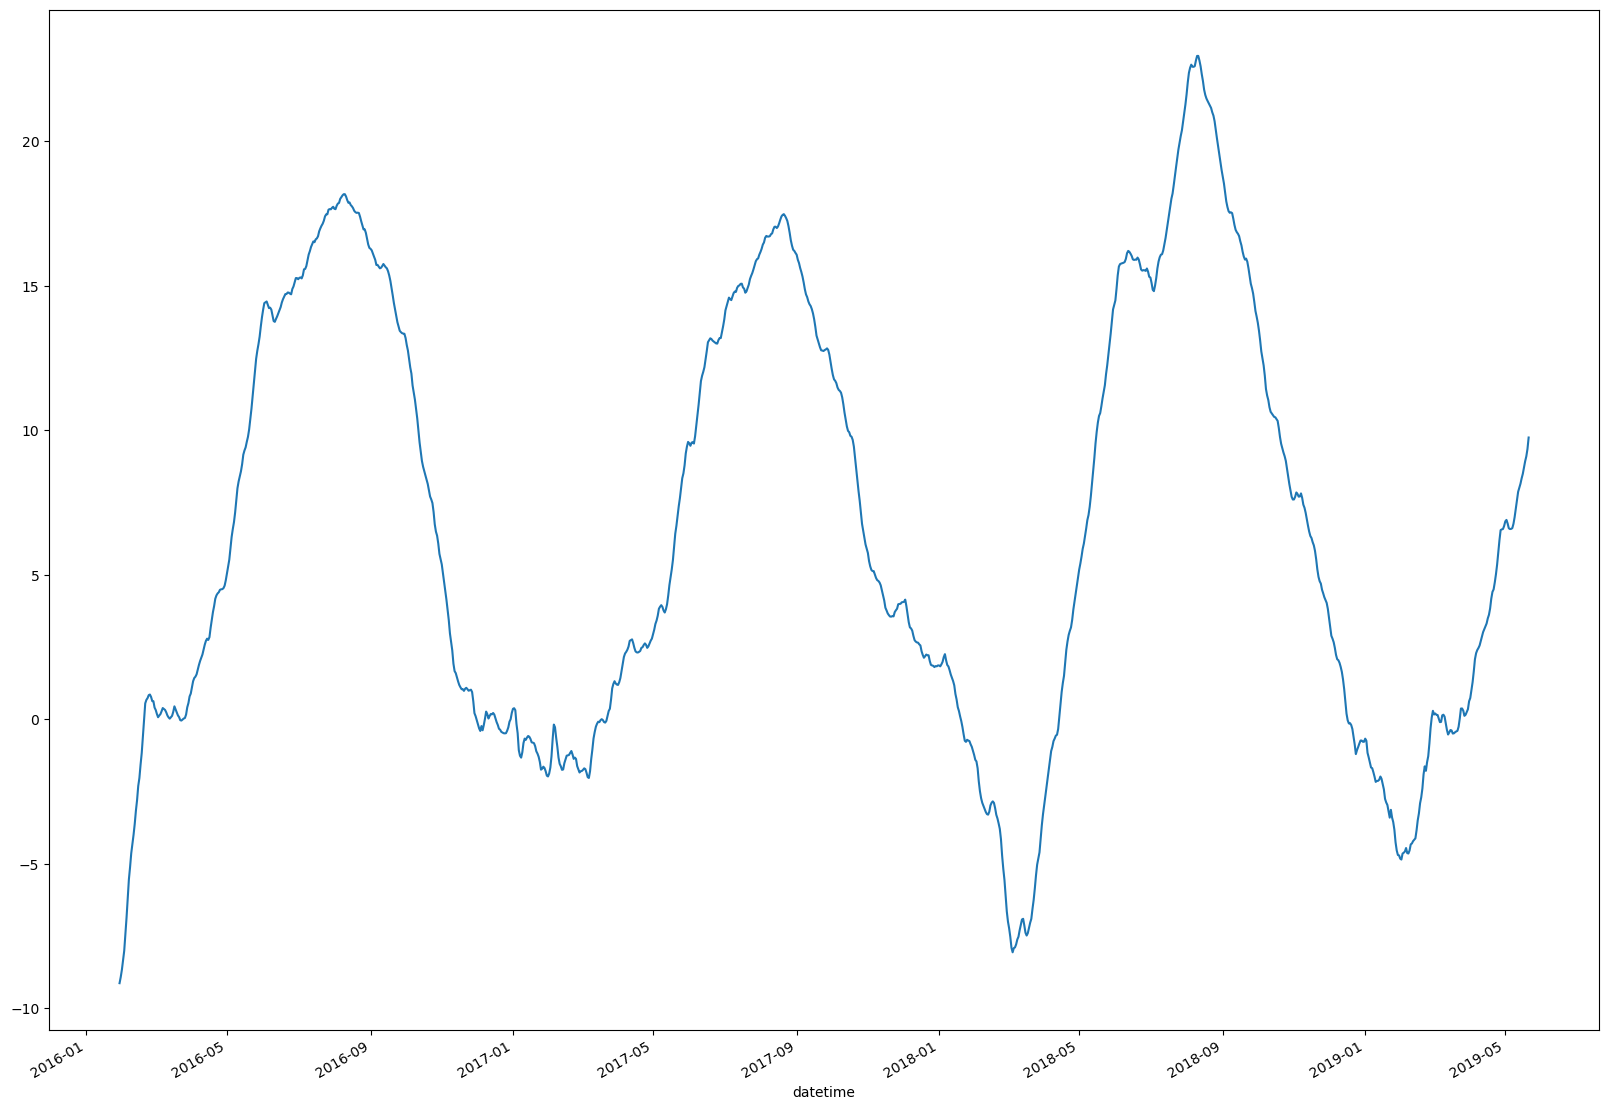

In [11]:
# Apply the Moving Average function by a subset of size 30 days.
temp_df_mean = temp_df.T_mu.rolling(window=30).mean()
temp_df_mean.plot(figsize=(20,15))

## Time Series Decomposition

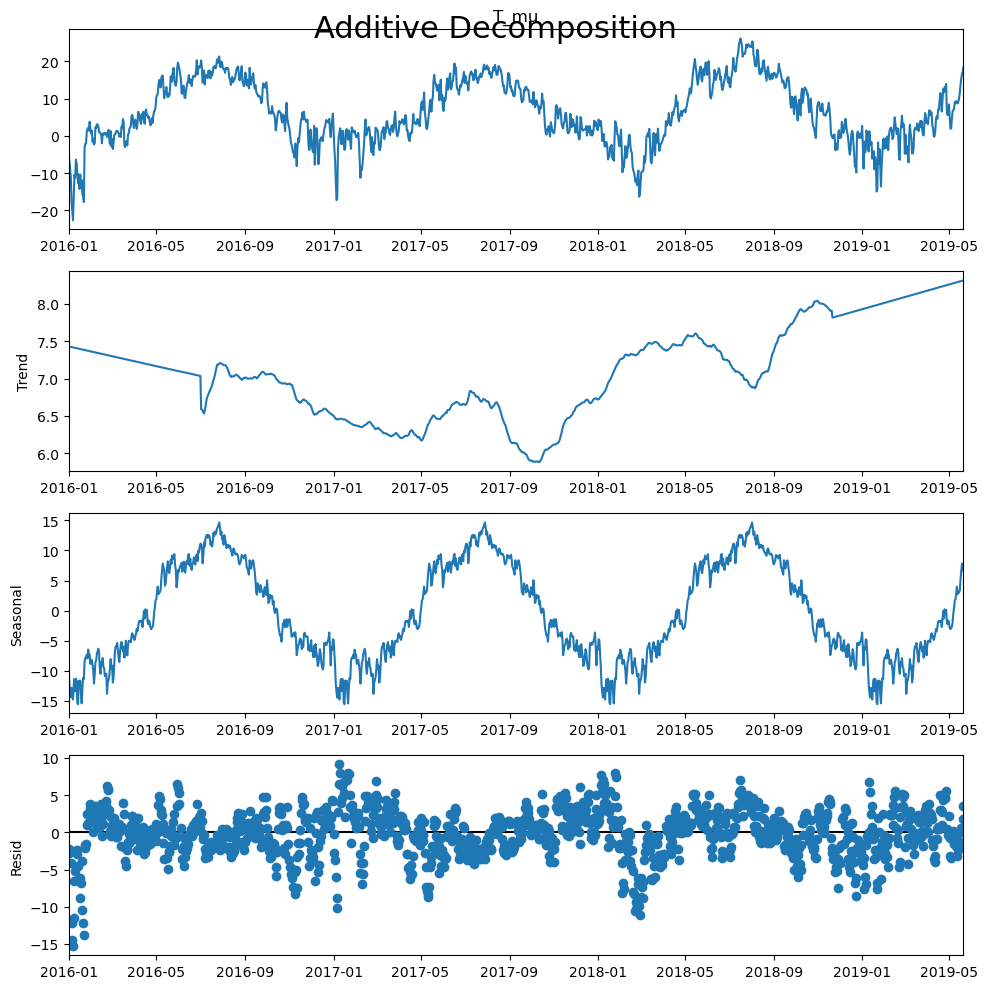

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(temp_df.T_mu, model='additive',period=365 , extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show()

In [19]:
# Shift the current temperature to the next day. 
predicted_df = temp_df["T_mu"].to_frame().shift(1).rename(columns = {"T_mu": "T_mu_pred" })
actual_df = temp_df["T_mu"].to_frame().rename(columns = {"T_mu": "T_mu_actual" })

# Concatenate the actual and predicted temperature
one_step_df = pd.concat([actual_df,predicted_df],axis=1)

# Select from the second row, because there is no prediction for today due to shifting.
one_step_df = one_step_df[1:]
one_step_df.head(10)

,T_mu_actual,T_mu_pred
datetime,,
2016-01-02,-7.0000,-4.5500
2016-01-03,-8.7375,-7.0000
2016-01-04,-11.1750,-8.7375
2016-01-05,-17.6250,-11.1750
2016-01-06,-20.2625,-17.6250
2016-01-07,-22.6750,-20.2625
2016-01-08,-16.5250,-22.6750
2016-01-09,-10.5250,-16.5250
2016-01-10,-11.2500,-10.5250


In [21]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

# Calculate the RMSE
temp_pred_err = MSE(one_step_df.T_mu_actual, one_step_df.T_mu_pred, squared=False)
print("The RMSE is",temp_pred_err)

The RMSE is 2.2618558244607696


# Weather Forecast using SARIMA Model

## Grid Selection

In [22]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [23]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(one_step_df.T_mu_actual,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

## Fitting the model

In [24]:
# Import the statsmodels library for using SARIMAX model
import statsmodels.api as sm

# Fit the SARIMAX model using optimal parameters
mod = sm.tsa.statespace.SARIMAX(one_step_df.T_mu_actual,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.57063D+00    |proj g|=  3.90338D-01


 This problem is unconstrained.



At iterate    5    f=  2.19565D+00    |proj g|=  9.78964D-02

At iterate   10    f=  2.16816D+00    |proj g|=  2.33028D-01
  ys=-4.431E-03  -gs= 4.254E-03 BFGS update SKIPPED

At iterate   15    f=  2.16788D+00    |proj g|=  2.01843D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     34      1     1     0   2.372D-06   2.168D+00
  F =   2.1678831742919460     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


## Diagnosing the model

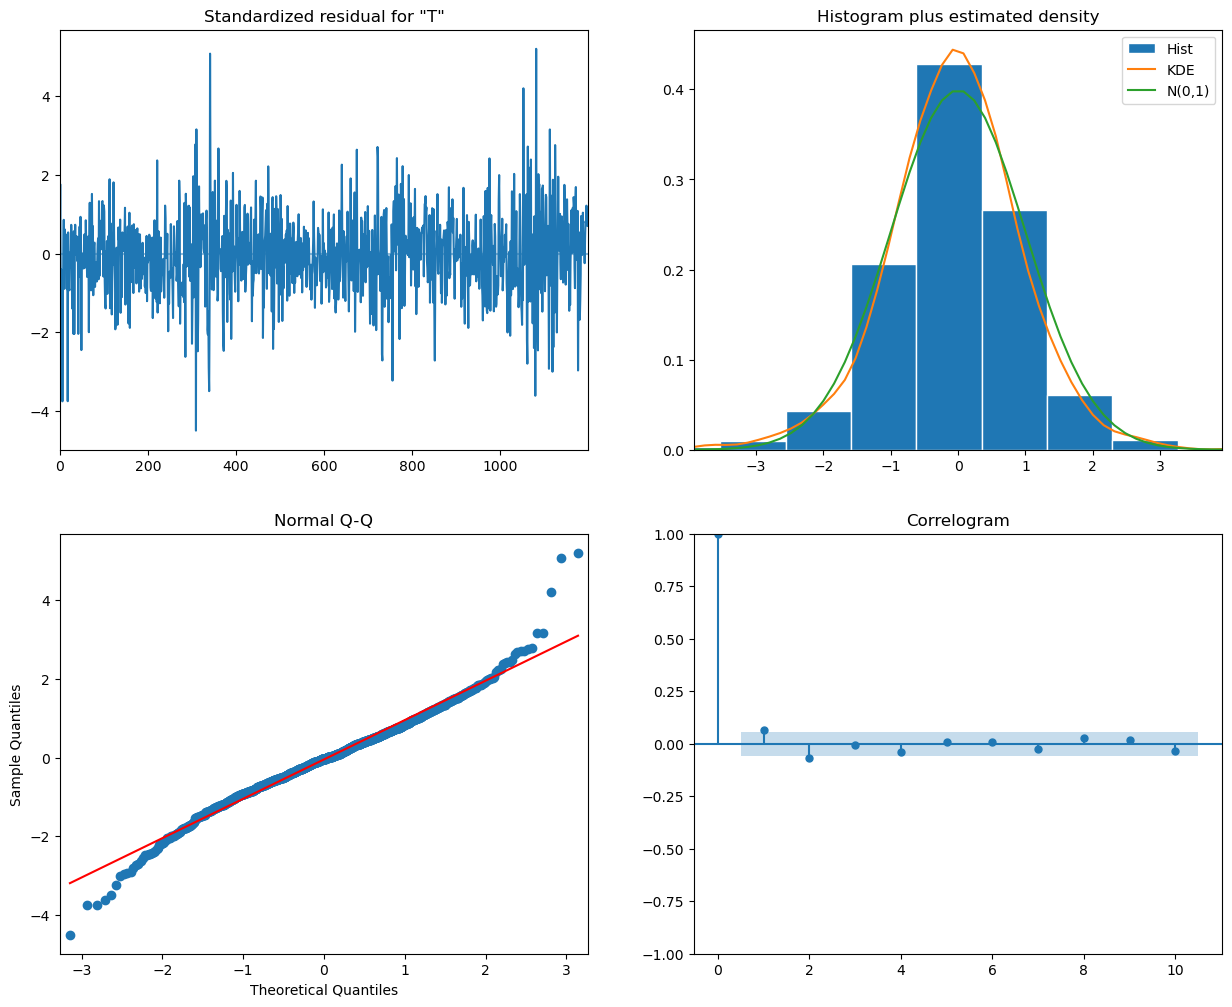

In [25]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

## Validating the Non-Dynamic Forecast


In [26]:
pred = results.get_prediction(start=pd.to_datetime('2017-10-29'), dynamic=False)
pred_ci = pred.conf_int()

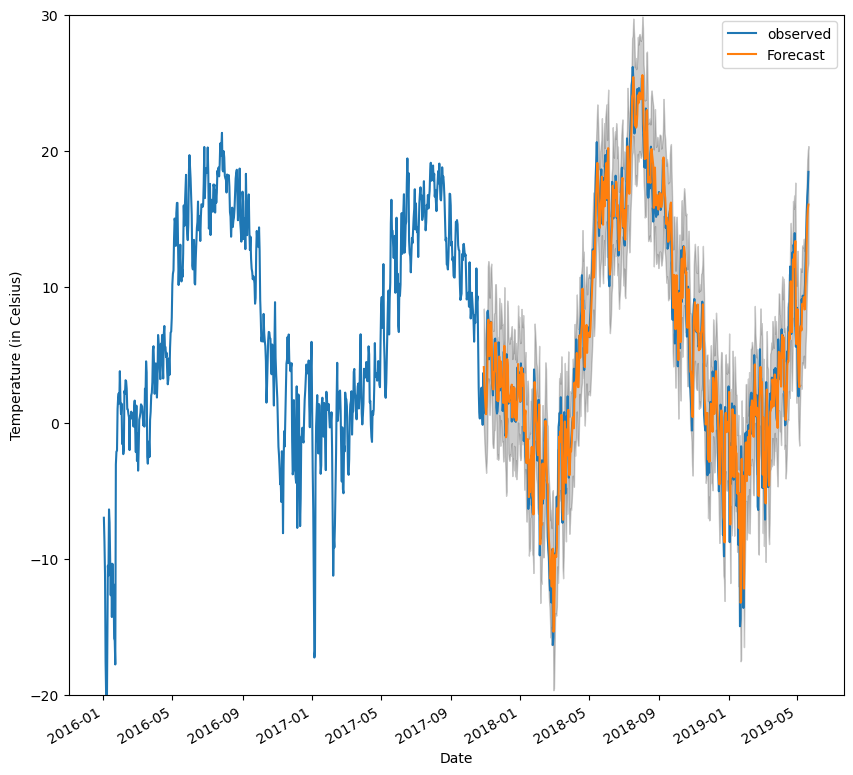

In [28]:
ax = one_step_df.T_mu_actual['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature (in Celsius)')
plt.ylim([-20,30])
plt.legend()
plt.show()

## Forecast Diagnostic

In [30]:
y_forecasted = pred.predicted_mean
y_truth = one_step_df.T_mu_actual['2017-10-29':]
print(y_forecasted.shape)
print(y_truth.shape)
# Compute the mean square error
mse = MSE(y_truth, y_forecasted, squared=True)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

(565,)
(565,)
The Mean Squared Error of our forecasts is 5.33


## Validating the Dynamic Forecast

In [31]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2017-10-29'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

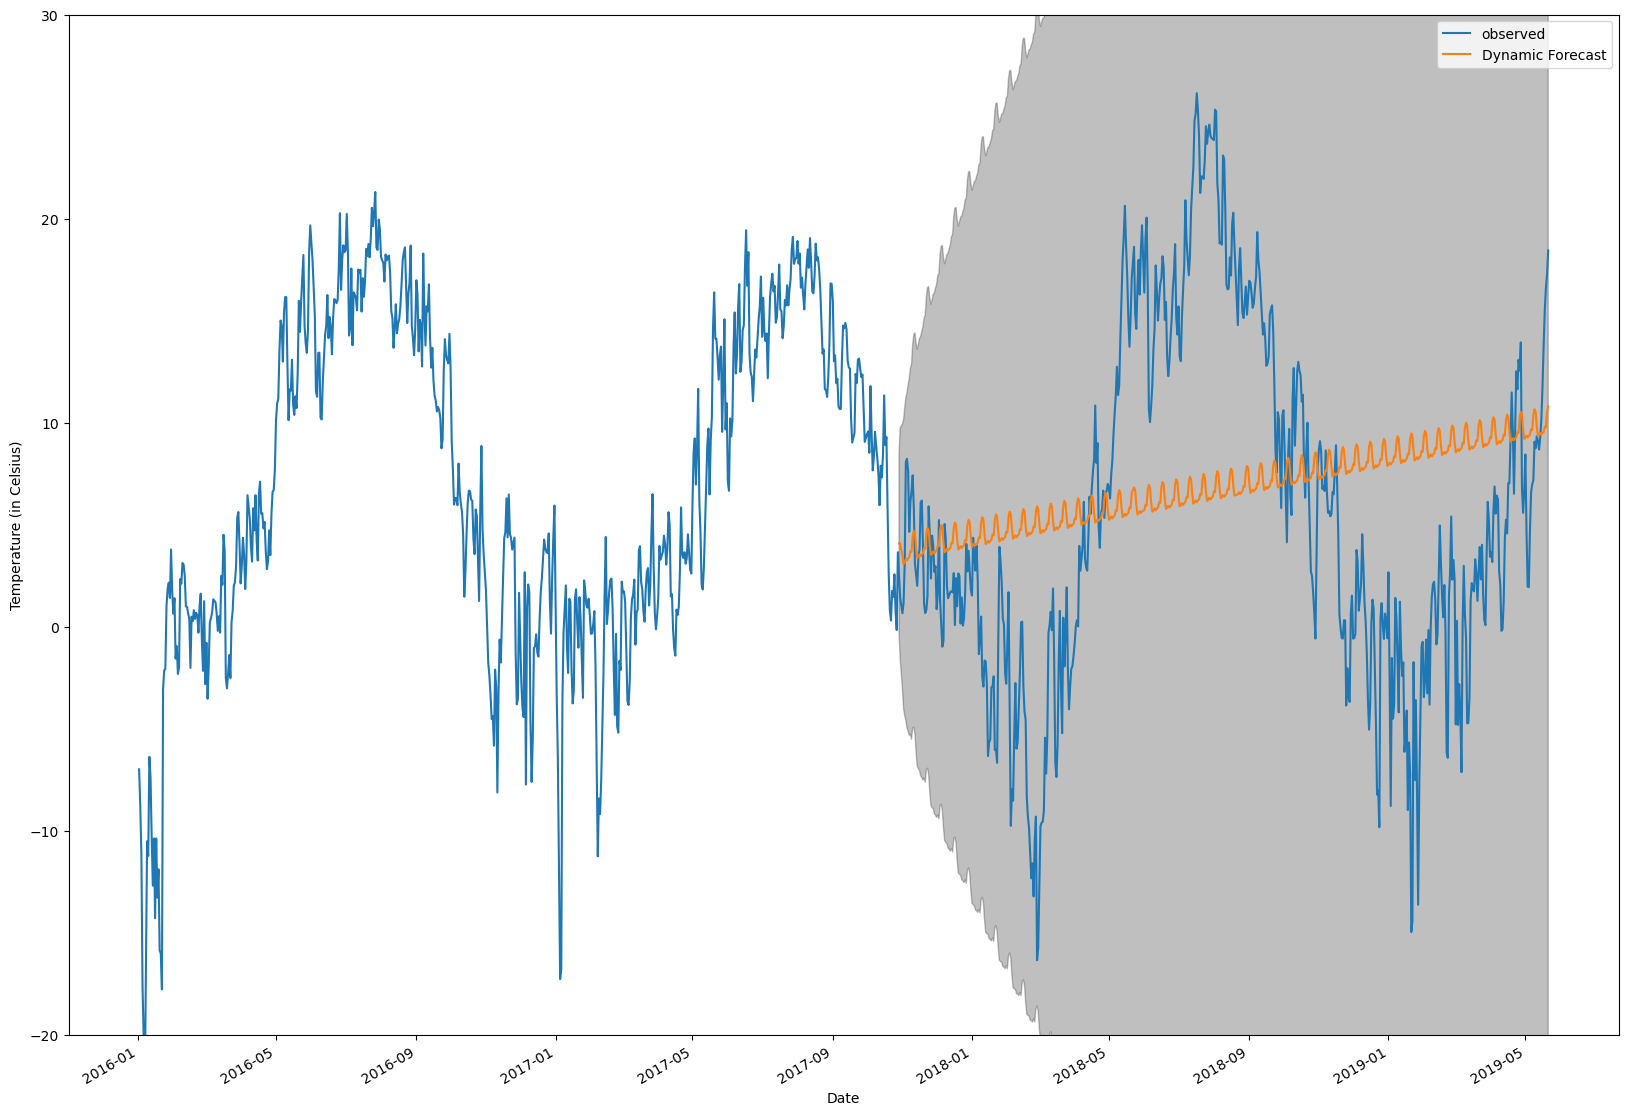

In [35]:
ax = one_step_df.T_mu_actual['2016':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)


ax.set_xlabel('Date')
ax.set_ylabel('Temperature (in Celsius)')
plt.ylim([-20,30])
plt.legend()
plt.show()

## Forecast Diagnostic

In [36]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = one_step_df.T_mu_actual['2017-10-29':]

# Compute the mean square error
mse = sqrt(MSE(y_truth, y_forecasted).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Root Mean Squared Error of our forecasts is 8.84
